In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import mcu
import swiss_roll_dataset_generator

In [4]:
control_vars = swiss_roll_dataset_generator.get_control_vars(mcu.get_p())
response_matrix = swiss_roll_dataset_generator.generate_array_of_swiss_rolls(control_vars)
standardized_x, centered_y, edges, y_means, y_scaler, x_means, x_stds = mcu.prepare_data(control_vars, response_matrix)
q = mcu.solve_semidefinite_programming(standardized_x, centered_y, edges)

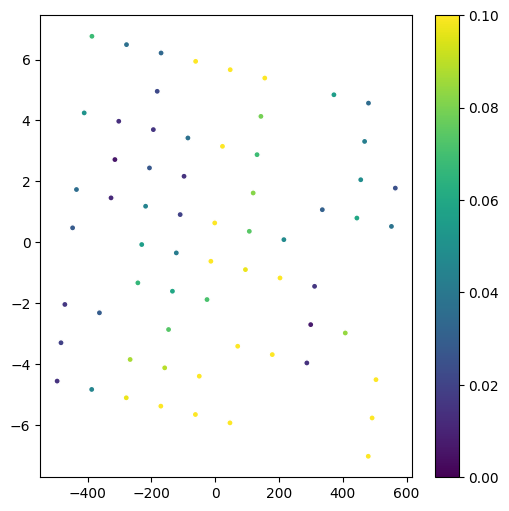

0.0533896837289917


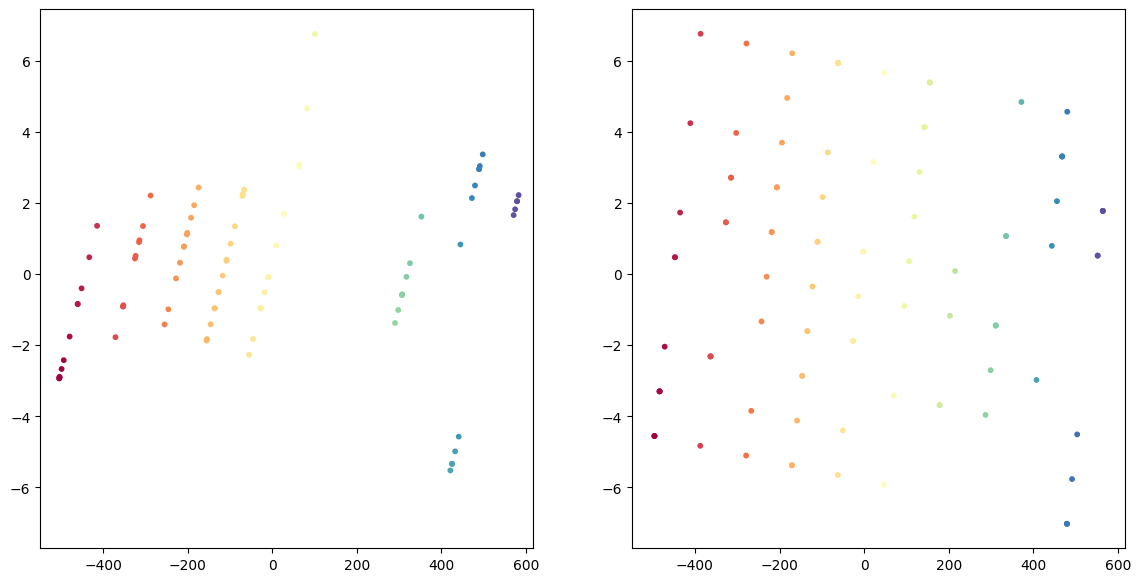

In [5]:
m_ = control_vars.shape[1]
# m_ = get_optimal_dimensionality(s)
ld_embedding = mcu.reduce_dimensions(q, m_)
regression_matrix = mcu.regress(ld_embedding, standardized_x)
reconstructed_y = np.dot(standardized_x, regression_matrix)

rre = mcu.compute_rre(ld_embedding, reconstructed_y)
mcu.plot_rre_heatmap(rre, reconstructed_y)
print(np.median(rre))
mcu.plot_two_embeddings(ld_embedding, reconstructed_y)

In [7]:
import swiss_roll_dataset_generator as gen
test_control_vars = gen.get_control_vars(gen.get_p(), 300)
test_rolls = gen.generate_array_of_swiss_rolls(test_control_vars, 300)
x_opts = []


In [8]:
for (roll, control_var) in zip(test_rolls, test_control_vars):
    x_opt, x_err = mcu.predictive_optimization(roll, centered_y, ld_embedding, regression_matrix, y_means, y_scaler)
    x_opt = x_opt * x_stds + x_means
    x_opts.append(x_opt)
    print("-----------")
    print(f"x_opt  = {x_opt}, x_err = {x_err}")
    print(f"x_real = {control_var}")

x_ops = np.array(x_opts)
test_control_vars = np.array(test_control_vars)

-----------
x_opt  = [8.33746036 6.9786673 ], x_err = 1.0766254471867133e-11
x_real = [1 7]
-----------
x_opt  = [6.52591176 5.05240752], x_err = 5.524750497578619e-12
x_real = [1 6]
-----------
x_opt  = [2.46784156 2.27741009], x_err = 3.1735942729649294e-13
x_real = [1 2]
-----------
x_opt  = [4.89517709 6.90184163], x_err = 4.742091703471189e-16
x_real = [4 8]
-----------
x_opt  = [8.31012672 4.04148638], x_err = 1.6912658084673567e-12
x_real = [1 4]
-----------
x_opt  = [1.93975968 2.40859592], x_err = 8.753396827361627e-12
x_real = [4 2]
-----------
x_opt  = [1.83303558 2.36008335], x_err = 9.091783991846368e-12
x_real = [2 2]
-----------
x_opt  = [2.57551117 2.69758961], x_err = 8.039611845514173e-12
x_real = [9 2]
-----------
x_opt  = [7.73756133 2.47745922], x_err = 1.0157839421088442e-12
x_real = [10  1]
-----------
x_opt  = [8.84895133 9.6124451 ], x_err = 2.7601920461127404e-17
x_real = [9 9]
-----------
x_opt  = [9.3073356  9.61648351], x_err = 2.3352012934156495e-13
x_real

[7.33749137 5.60657045 1.4938257  1.41678997 7.31024444 2.10036682
 0.39690948 6.462251   2.70213147 0.63079687 0.92727336 1.770002
 2.19986106 5.54522882 0.67117132 5.90705295 6.24425968 3.73647544
 1.28550059 5.64353393 1.03353405 2.06179496 1.94894    2.49250233
 0.62429603 1.81946463 4.79649856 1.01695733 0.88047882 6.33721412
 3.67382989 8.23666985 0.52092304 0.66077015 3.77267435 1.14381702
 2.32710488 2.09522396 1.87390035 3.30602846 1.60297912 2.41249807
 3.77539272 1.93565422 2.32529969 2.64540468 7.37257075 2.56203951
 1.18393646 1.13094545 4.41107356 2.70028407 1.45552113 2.10513088
 5.18195772 7.44159845 0.92006977 4.23390144 2.50629148 1.78192061
 1.28550059 3.97466782 1.3798898  6.0326575  3.66145424 6.70763282
 4.94594179 1.65239371 3.59822471 7.18935577 7.68690176 6.7889558
 5.71895536 2.81834563 1.85194764 6.36676134 6.96959064 1.60010858
 1.11084311 1.75823105 5.25560201 4.10501573 8.33430346 1.31142928
 0.63768454 1.54999993 6.79890284 0.35536997 2.74314469 0.8503376

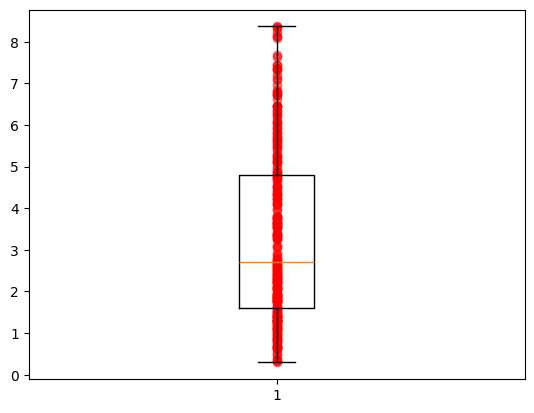

In [9]:
errors = np.linalg.norm(x_opts - test_control_vars, axis = 1)
plt.boxplot(errors)
plt.scatter(np.ones_like(errors), errors, alpha=0.5, color='red')
print(errors)
print(f"Median of errors = {np.median(errors)}")